In [136]:
import pandas as pd
import matplotlib.pyplot as plt

train = pd.read_csv('kospi_reg_train.csv')
test = pd.read_csv('kospi_reg_test.csv')

In [137]:
print(train.shape)
print(test.shape)

(355, 159)
(91, 159)


In [138]:
from pycaret.regression import *

In [157]:
#clf = setup(data = train, target = 'kospi_close', feature_selection = True, remove_multicollinearity = True, ignore_low_variance = True)
clf = setup(data = train, target = 'kospi_close', feature_selection = True, ignore_low_variance = True)
# clf = setup(data = train, target = 'kospi_close', feature_selection = True)

 
Setup Succesfully Completed.


,Description,Value
0,session_id,6585
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(355, 159)"
4,Missing Values,False
5,Numeric Features,158
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 0
INFO:logs:setup() succesfully completed......................................


In [158]:
best_3 = compare_models( n_select = 3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Bayesian Ridge,0.0155,0.0005,0.0214,0.9994,0.0123,0.0525,0.0488
1,Ridge Regression,0.0234,0.0013,0.0345,0.9985,0.0177,-0.0115,0.0091
2,Orthogonal Matching Pursuit,0.0475,0.0042,0.0635,0.9949,0.0367,0.0060,0.0091
3,Extra Trees Regressor,0.0460,0.0085,0.0814,0.9921,0.0367,0.6410,0.2486
4,Gradient Boosting Regressor,0.0460,0.0092,0.0812,0.9914,0.0368,0.1480,0.7269
5,Random Forest,0.0578,0.0138,0.1028,0.9873,0.0437,1.1725,0.2652
6,CatBoost Regressor,0.0580,0.0144,0.1043,0.9869,0.0452,-0.0252,14.4302
7,Extreme Gradient Boosting,0.0601,0.0170,0.1131,0.9844,0.0482,1.1157,0.1530
8,AdaBoost Regressor,0.0744,0.0164,0.1145,0.9832,0.0548,0.8802,0.3334
9,Light Gradient Boosting Machine,0.0845,0.0351,0.1659,0.9672,0.0677,2.1959,0.0501


INFO:logs:create_model_container: 3
INFO:logs:master_model_container: 3
INFO:logs:display_container: 4
INFO:logs:[BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False), Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=6585, solver='auto', tol=0.001), OrthogonalMatchingPursuit(fit_intercept=True, n_nonzero_coefs=None,
                          normalize=True, precompute='auto', tol=None)]
INFO:logs:compare_models() succesfully completed......................................


In [159]:
blended = blend_models(estimator_list = best_3, fold = 5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0229,0.0007,0.0272,0.9986,0.0197,0.5186
1,0.0275,0.0016,0.0401,0.9986,0.0177,-0.0112
2,0.0211,0.0007,0.0268,0.9991,0.0179,-0.0405
3,0.0255,0.0016,0.0397,0.9981,0.0198,-0.0370
4,0.0224,0.0010,0.0316,0.9991,0.0164,-0.0078
Mean,0.0239,0.0011,0.0331,0.9987,0.0183,0.0844
SD,0.0023,0.0004,0.0058,0.0004,0.0013,0.2175


INFO:logs:create_model_container: 4
INFO:logs:master_model_container: 4
INFO:logs:display_container: 5
INFO:logs:VotingRegressor(estimators=[('Bayesian Ridge_0',
                             BayesianRidge(alpha_1=1e-06, alpha_2=1e-06,
                                           alpha_init=None, compute_score=False,
                                           copy_X=True, fit_intercept=True,
                                           lambda_1=1e-06, lambda_2=1e-06,
                                           lambda_init=None, n_iter=300,
                                           normalize=False, tol=0.001,
                                           verbose=False)),
                            ('Ridge_1',
                             Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=None, normalize=False,
                                   random_state=6585, solver='auto',
                                   tol=0.001)),
                          

In [160]:
pred_holdout = predict_model(blended)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,0.0244,0.0013,0.0364,0.9985,0.0199,-0.0347


In [161]:
final_model = finalize_model(blended)

INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=VotingRegressor(estimators=[('Bayesian Ridge_0',
                             BayesianRidge(alpha_1=1e-06, alpha_2=1e-06,
                                           alpha_init=None, compute_score=False,
                                           copy_X=True, fit_intercept=True,
                                           lambda_1=1e-06, lambda_2=1e-06,
                                           lambda_init=None, n_iter=300,
                                           normalize=False, tol=0.001,
                                           verbose=False)),
                            ('Ridge_1',
                             Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=None, normalize=False,
                                   random_state=6585, solver='auto',
                                   tol=0.001)),
                            ('Orthogonal Matching Pursuit_2',
      

In [162]:
predictions = predict_model(final_model, data = test)

In [163]:
predictions

,date,kospi_close,kospi_dividend_yield_ratio,kospi_per,kospi_pbr,kospi_open,kospi_high,kospi_low,kospi_volume,kospi_value,...,nikkei_volume,hangseng_close,hangseng_volume,sse_close,sse_volume,estx_close,Volume,euronext_close,euronext_volume,Label
index,,,,,,,,,,,,,,,,,,,,,
0,20200420,-1.542973,1.401264,0.178334,-1.619108,-1.481188,-1.486478,-1.456441,2.034579,1.224300,...,-0.369336,-1.359869,-0.722263,-0.298911,-0.144488,-1.679865,0.414248,-1.704088,0.105401,-1.5211
1,20200421,-1.670460,1.532706,0.149389,-1.745791,-1.626348,-1.672313,-1.796207,2.375278,1.747556,...,0.196092,-1.671748,0.518136,-0.418580,0.053814,-2.135725,0.744114,-2.091046,0.611680,-1.7099
2,20200422,-1.557818,1.445078,0.174716,-1.619108,-1.836883,-1.675212,-1.775165,0.986547,0.555930,...,0.078295,-1.613723,-0.259195,-0.339080,-0.093522,-1.967672,0.375740,-1.932113,0.253173,-1.6295
3,20200423,-1.433017,1.313636,0.201852,-1.492425,-1.487181,-1.498347,-1.437906,0.450412,0.474132,...,-0.070916,-1.564912,-0.028691,-0.364761,0.198369,-1.899925,0.390445,-1.843761,0.240225,-1.4240
4,20200424,-1.605776,1.488892,0.163861,-1.619108,-1.496472,-1.603514,-1.538628,1.432111,0.614691,...,0.404201,-1.649784,-0.838203,-0.505187,0.072346,-2.067323,0.422930,-1.994245,0.184159,-1.5664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,20200911,1.804270,-0.877064,2.490339,1.041240,1.760120,1.772776,1.715173,1.231857,1.265403,...,0.097927,-1.259125,-0.830412,1.611828,-0.052750,-0.112323,0.199079,-0.474991,-0.439939,1.7369
87,20200914,2.013972,-0.964692,2.557274,1.167923,1.952477,1.990216,1.957844,1.546549,1.252740,...,-0.353630,-1.179498,-1.170237,1.698361,-0.125028,-0.108542,-0.180911,-0.435351,-0.788107,1.9413
88,20200915,2.119226,-1.052320,2.591647,1.167923,2.061952,2.097176,2.043593,1.102724,1.204056,...,-0.494987,-1.125734,-0.155918,1.777387,-0.275144,-0.048859,-0.004697,-0.376699,-0.380933,2.0264


In [164]:
score = predictions[['kospi_close', 'Label']]
score.to_csv('kospi_score_reg.csv', index = False)
score.head()

,kospi_close,Label
index,,
0,-1.542973,-1.5211
1,-1.670460,-1.7099
2,-1.557818,-1.6295
3,-1.433017,-1.4240
4,-1.605776,-1.5664


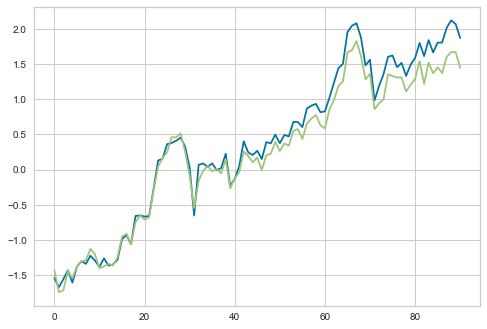

In [147]:
plt.plot(score)

In [ ]:
# lightgbm

In [165]:
lgbm  = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0679,0.0133,0.1151,0.9763,0.0681,-0.4047
1,0.0610,0.0092,0.0958,0.9824,0.0442,22.7954
2,0.1189,0.0547,0.2339,0.9476,0.0851,-0.0980
3,0.1060,0.0907,0.3011,0.9299,0.0729,-0.0041
4,0.0648,0.0073,0.0856,0.9831,0.0568,-0.1013
5,0.0862,0.0209,0.1444,0.9829,0.0665,-0.0076
6,0.0615,0.0068,0.0822,0.9928,0.0538,-0.0821
7,0.0858,0.0233,0.1527,0.9664,0.0851,-0.0363
8,0.1249,0.1124,0.3353,0.9296,0.0844,-0.0617
9,0.0681,0.0127,0.1125,0.9809,0.0597,-0.0405


INFO:logs:create_model_container: 6
INFO:logs:master_model_container: 6
INFO:logs:display_container: 8
INFO:logs:LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=6585, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................


In [166]:
tuned_lgbm = tune_model(lgbm)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0836,0.0142,0.1194,0.9745,0.0755,-0.3302
1,0.0673,0.0146,0.1206,0.9721,0.0499,30.3717
2,0.1413,0.0643,0.2535,0.9384,0.0942,-0.1977
3,0.1439,0.1417,0.3764,0.8904,0.0978,-0.0578
4,0.0878,0.0131,0.1145,0.9697,0.0693,-0.2346
5,0.0930,0.0320,0.1788,0.9738,0.0642,-0.0142
6,0.0847,0.0107,0.1035,0.9886,0.0653,-0.1528
7,0.1168,0.0292,0.1709,0.9579,0.0871,-0.0006
8,0.1659,0.1583,0.3978,0.9009,0.1064,-0.0709
9,0.0717,0.0091,0.0952,0.9864,0.0557,-0.0714


INFO:logs:create_model_container: 7
INFO:logs:master_model_container: 7
INFO:logs:display_container: 9
INFO:logs:LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=70,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.2,
              n_estimators=200, n_jobs=-1, num_leaves=200, objective=None,
              random_state=6585, reg_alpha=0.4, reg_lambda=0.4, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


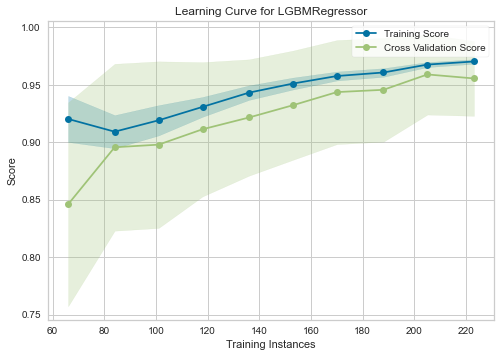

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [167]:
plot_model(tuned_lgbm, plot = 'learning')

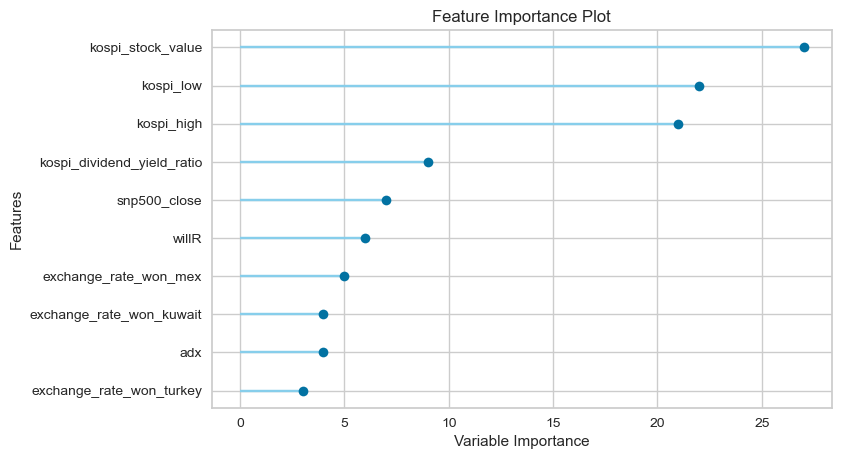

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [168]:
plot_model(estimator = tuned_lgbm, plot = 'feature')

In [169]:
evaluate_model(tuned_lgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [170]:
predict_model(tuned_lgbm, data=test)

,date,kospi_close,kospi_dividend_yield_ratio,kospi_per,kospi_pbr,kospi_open,kospi_high,kospi_low,kospi_volume,kospi_value,...,nikkei_volume,hangseng_close,hangseng_volume,sse_close,sse_volume,estx_close,Volume,euronext_close,euronext_volume,Label
index,,,,,,,,,,,,,,,,,,,,,
0,20200420,-1.542973,1.401264,0.178334,-1.619108,-1.481188,-1.486478,-1.456441,2.034579,1.224300,...,-0.369336,-1.359869,-0.722263,-0.298911,-0.144488,-1.679865,0.414248,-1.704088,0.105401,-2.1429
1,20200421,-1.670460,1.532706,0.149389,-1.745791,-1.626348,-1.672313,-1.796207,2.375278,1.747556,...,0.196092,-1.671748,0.518136,-0.418580,0.053814,-2.135725,0.744114,-2.091046,0.611680,-2.1429
2,20200422,-1.557818,1.445078,0.174716,-1.619108,-1.836883,-1.675212,-1.775165,0.986547,0.555930,...,0.078295,-1.613723,-0.259195,-0.339080,-0.093522,-1.967672,0.375740,-1.932113,0.253173,-2.1429
3,20200423,-1.433017,1.313636,0.201852,-1.492425,-1.487181,-1.498347,-1.437906,0.450412,0.474132,...,-0.070916,-1.564912,-0.028691,-0.364761,0.198369,-1.899925,0.390445,-1.843761,0.240225,-2.1653
4,20200424,-1.605776,1.488892,0.163861,-1.619108,-1.496472,-1.603514,-1.538628,1.432111,0.614691,...,0.404201,-1.649784,-0.838203,-0.505187,0.072346,-2.067323,0.422930,-1.994245,0.184159,-2.1653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,20200911,1.804270,-0.877064,2.490339,1.041240,1.760120,1.772776,1.715173,1.231857,1.265403,...,0.097927,-1.259125,-0.830412,1.611828,-0.052750,-0.112323,0.199079,-0.474991,-0.439939,0.5644
87,20200914,2.013972,-0.964692,2.557274,1.167923,1.952477,1.990216,1.957844,1.546549,1.252740,...,-0.353630,-1.179498,-1.170237,1.698361,-0.125028,-0.108542,-0.180911,-0.435351,-0.788107,0.7284
88,20200915,2.119226,-1.052320,2.591647,1.167923,2.061952,2.097176,2.043593,1.102724,1.204056,...,-0.494987,-1.125734,-0.155918,1.777387,-0.275144,-0.048859,-0.004697,-0.376699,-0.380933,0.7162


In [171]:
predictions = predict_model(tuned_lgbm, data=test)
predictions.head()

,date,kospi_close,kospi_dividend_yield_ratio,kospi_per,kospi_pbr,kospi_open,kospi_high,kospi_low,kospi_volume,kospi_value,...,nikkei_volume,hangseng_close,hangseng_volume,sse_close,sse_volume,estx_close,Volume,euronext_close,euronext_volume,Label
index,,,,,,,,,,,,,,,,,,,,,
0,20200420,-1.542973,1.401264,0.178334,-1.619108,-1.481188,-1.486478,-1.456441,2.034579,1.224300,...,-0.369336,-1.359869,-0.722263,-0.298911,-0.144488,-1.679865,0.414248,-1.704088,0.105401,-2.1429
1,20200421,-1.670460,1.532706,0.149389,-1.745791,-1.626348,-1.672313,-1.796207,2.375278,1.747556,...,0.196092,-1.671748,0.518136,-0.418580,0.053814,-2.135725,0.744114,-2.091046,0.611680,-2.1429
2,20200422,-1.557818,1.445078,0.174716,-1.619108,-1.836883,-1.675212,-1.775165,0.986547,0.555930,...,0.078295,-1.613723,-0.259195,-0.339080,-0.093522,-1.967672,0.375740,-1.932113,0.253173,-2.1429
3,20200423,-1.433017,1.313636,0.201852,-1.492425,-1.487181,-1.498347,-1.437906,0.450412,0.474132,...,-0.070916,-1.564912,-0.028691,-0.364761,0.198369,-1.899925,0.390445,-1.843761,0.240225,-2.1653
4,20200424,-1.605776,1.488892,0.163861,-1.619108,-1.496472,-1.603514,-1.538628,1.432111,0.614691,...,0.404201,-1.649784,-0.838203,-0.505187,0.072346,-2.067323,0.422930,-1.994245,0.184159,-2.1653


In [172]:
score = predictions[['kospi_close', 'Label']]
score.to_csv('kospi_score_reg.csv', index = False)
score.head()

,kospi_close,Label
index,,
0,-1.542973,-2.1429
1,-1.670460,-2.1429
2,-1.557818,-2.1429
3,-1.433017,-2.1653
4,-1.605776,-2.1653


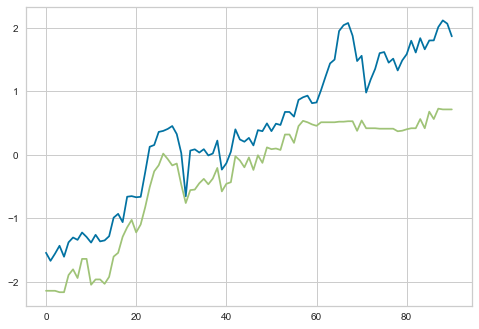

In [173]:
plt.plot(score)